In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar
import scipy.stats

In [2]:
plt.style.use('ggplot')

In [3]:
outbound = pd.read_csv('../data/clean/LAX_Origin_Flight_Delays_2016.csv')
inbound = pd.read_csv('../data/clean/LAX_Dest_Flight_Delays_2016.csv')

In [29]:
# Calculate total flights per month
total_outbound_flights = outbound.groupby(['Month']).count()
total_outbound_flights = pd.DataFrame(total_outbound_flights['TailNum'])
total_outbound_flights = total_outbound_flights.rename(columns={'TailNum':'Outbound Flights'})

total_inbound_flights = inbound.groupby(['Month']).count()
total_inbound_flights = pd.DataFrame(total_inbound_flights['TailNum'])
total_inbound_flights = total_inbound_flights.rename(columns={'TailNum':'Inbound Flights'})

total_flights = pd.concat([total_outbound_flights, total_inbound_flights], axis=1, join_axes=[total_outbound_flights.index])
total_flights['Total Flights'] = total_flights.sum(axis=1)
total_flights = total_flights[['Total Flights']]

In [5]:
#Outbound Flight Delays
outbound_delays = outbound.loc[outbound['DepDel15'] == 1]
total_outbound_delays = len(outbound_delays['FlightNum'])

monthly_outbound = outbound_delays.groupby(['Month']).sum()
m_outbound_sum = pd.DataFrame(monthly_outbound['DepDel15'])

#Inbound Flight Delays
inbound_delays = inbound.loc[inbound['ArrDel15'] == 1]
total_inbound_delays = len(inbound_delays['FlightNum'])

monthly_inbound = inbound_delays.groupby(['Month']).sum()
m_inbound_sum = pd.DataFrame(monthly_inbound['ArrDel15'])


In [6]:
merged = m_outbound_sum.join(m_inbound_sum)
merged['AllDelays'] = merged.sum(axis=1)
total_delays = pd.DataFrame(merged['AllDelays']).astype(int)

In [7]:
# Calculate percentage delayed flights per month

perc_delays = pd.concat([total_delays, total_flights], axis=1, join_axes=[total_delays.index])
perc_delays['Delay Percentage'] = round((perc_delays['AllDelays']/perc_delays['Total Flights'])*100, 2)
perc_delays = perc_delays[['Delay Percentage']]

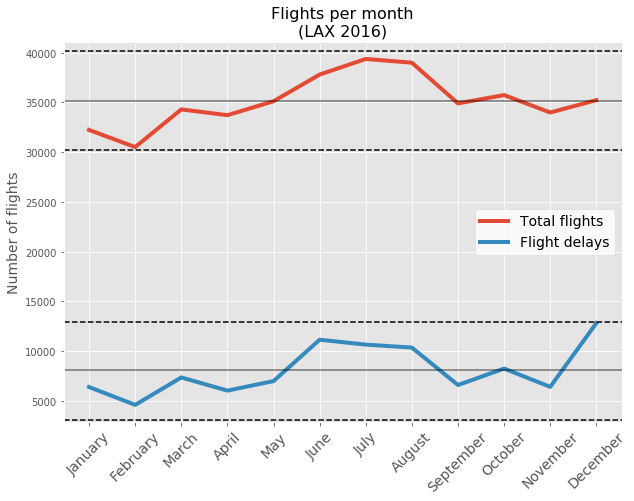

In [40]:
x_axis = np.arange(0,12,1)
y_axis = np.arange(3,14,1)
months = calendar.month_name[1:13]

plt.figure(figsize=(10,7))
plt.plot(x_axis, total_flights['Total Flights'], label='Total flights', linewidth=4)
plt.plot(x_axis, total_delays['AllDelays'], label='Flight delays', linewidth=4)

plt.xticks(x_axis, months, rotation=45, size=14)
#plt.yticks(np.arange(3000, 14000, 1000), y_axis)
plt.ylabel('Number of flights', size=14)
plt.title('Flights per month\n(LAX 2016)', size=16)
legend = plt.legend(loc=5, fontsize=14)
frame = legend.get_frame()
frame.set_facecolor('1')
plt.axhline(y=40125, color='k',linestyle='--')
plt.axhline(y=30183, color='k',linestyle='--')
plt.axhline(y=35155, color='k',linestyle='-', alpha=0.5)

plt.axhline(y=12943, color='k',linestyle='--')
plt.axhline(y=3116, color='k',linestyle='--')
plt.axhline(y=8130, color='k',linestyle='-', alpha=0.5)

#plt.savefig('images/flights_per_month.png', bbox_inches='tight')
plt.show()

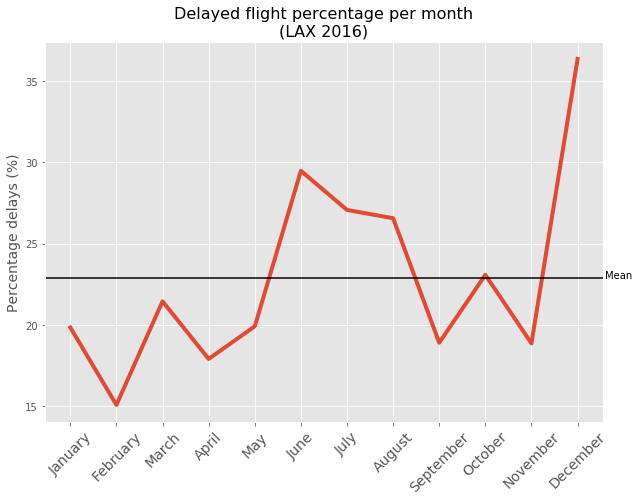

In [52]:
x_axis = np.arange(0,12,1)
y_axis = np.arange(3,14,1)
months = calendar.month_name[1:13]

plt.figure(figsize=(10,7))
plt.plot(x_axis, perc_delays['Delay Percentage'], linewidth=4)
plt.xticks(x_axis, months, rotation=45, size=14)
#plt.yticks(np.arange(3000, 14000, 1000), y_axis)
plt.ylabel('Percentage delays (%)', size=14)
plt.title('Delayed flight percentage per month\n(LAX 2016)', size=16)
plt.axhline(y=22.87, color='k')
plt.text(11.6,22.87, 'Mean')

#plt.savefig('images/flight_delay_percent.png', bbox_inches='tight')
plt.show()

In [35]:
std = np.std(total_flights['Total Flights'])
mean = np.mean(total_flights['Total Flights'])
mean

35154.5

In [26]:
scipy.stats.normaltest(total_flights['Total Flights'])

C:\Users\stua8323\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=0.048169990239496883, pvalue=0.97620273376342703)

In [27]:
z,pval = scipy.stats.normaltest(total_flights['Total Flights'])

if(pval < 0.05):
    print("Not normal distribution")
elif(pval > 0.05):
    print("Normal")

Normal


C:\Users\stua8323\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [39]:
std2 = np.std(total_delays['AllDelays'])
mean2 = np.mean(total_delays['AllDelays'])

print(mean2)
print(mean2 + (std2*2))
print(mean2 - (std2*2))

8129.916666666667
12943.095343198656
3316.7379901346785


In [45]:
mean3 = np.mean(perc_delays['Delay Percentage'])
std3 = np.std(perc_delays['Delay Percentage'])

print(f'Mean: {mean3}')
print(f'Upper: {mean3 + std3*2}')
print(f'Lower: {mean3 - std3*2}')

Mean: 22.867499999999996
Upper: 34.34418397229791
Lower: 11.390816027702076


In [63]:
zscore_delay = scipy.stats.zscore(total_delays['AllDelays'])
zscore_flights = scipy.stats.zscore(total_flights['Total Flights'])
z_d_mean = np.mean(zscore_delay)
z_f_mean = np.mean(zscore_flights)
print(z_d_mean)
print(z_f_mean)

-1.11022302463e-16
-4.8283136748e-17


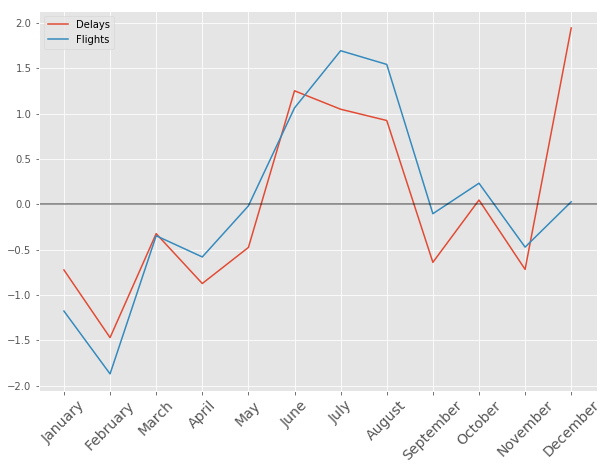

In [69]:
x_axis = np.arange(0,12,1)
months = calendar.month_name[1:13]

plt.figure(figsize=(10,7))

plt.plot(x_axis, zscore_delay, label='Delays')

plt.plot(x_axis, zscore_flights, label='Flights')
plt.xticks(x_axis, months, rotation=45, size=14)
plt.axhline(0,color='k',alpha=0.5)
plt.legend()
plt.show()